In [73]:
#you'll need to sudo pip3 install gensim from a terminal, since the software 
#doesn't come with the deep learning ami. remember to use pip3 since this is a python3 notebook
import os
import gensim
import gensim.downloader as api
from gensim.models.word2vec import Word2Vec
import numpy as np

#gensim expects nltks word tokens, not strings
#sudo pip3 install nltk
from nltk import word_tokenize, FreqDist
import nltk
nltk.download('punkt')

import tensorflow as tf
from tensorflow.contrib.tensorboard.plugins import projector

[nltk_data] Downloading package punkt to /home/ubuntu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
#download rotten tomatoes reviews
!wget http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz
    
#unzip
!tar xvzf review_polarity.tar.gz

--2018-05-01 14:31:50--  http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz
Resolving www.cs.cornell.edu (www.cs.cornell.edu)... 132.236.207.20
Connecting to www.cs.cornell.edu (www.cs.cornell.edu)|132.236.207.20|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3127238 (3.0M) [application/x-gzip]
Saving to: ‘review_polarity.tar.gz.5’

review_polarity.tar 100%[===================>]   2.98M  11.4MB/s    in 0.3s    

2018-05-01 14:31:51 (11.4 MB/s) - ‘review_polarity.tar.gz.5’ saved [3127238/3127238]

txt_sentoken/neg/cv000_29416.txt
txt_sentoken/neg/cv001_19502.txt
txt_sentoken/neg/cv002_17424.txt
txt_sentoken/neg/cv003_12683.txt
txt_sentoken/neg/cv004_12641.txt
txt_sentoken/neg/cv005_29357.txt
txt_sentoken/neg/cv006_17022.txt
txt_sentoken/neg/cv007_4992.txt
txt_sentoken/neg/cv008_29326.txt
txt_sentoken/neg/cv009_29417.txt
txt_sentoken/neg/cv010_29063.txt
txt_sentoken/neg/cv011_13044.txt
txt_sentoken/neg/cv012_29411.txt
txt_sentoken/neg

txt_sentoken/pos/cv010_29198.txt
txt_sentoken/pos/cv011_12166.txt
txt_sentoken/pos/cv012_29576.txt
txt_sentoken/pos/cv013_10159.txt
txt_sentoken/pos/cv014_13924.txt
txt_sentoken/pos/cv015_29439.txt
txt_sentoken/pos/cv016_4659.txt
txt_sentoken/pos/cv017_22464.txt
txt_sentoken/pos/cv018_20137.txt
txt_sentoken/pos/cv019_14482.txt
txt_sentoken/pos/cv020_8825.txt
txt_sentoken/pos/cv021_15838.txt
txt_sentoken/pos/cv022_12864.txt
txt_sentoken/pos/cv023_12672.txt
txt_sentoken/pos/cv024_6778.txt
txt_sentoken/pos/cv025_3108.txt
txt_sentoken/pos/cv026_29325.txt
txt_sentoken/pos/cv027_25219.txt
txt_sentoken/pos/cv028_26746.txt
txt_sentoken/pos/cv029_18643.txt
txt_sentoken/pos/cv030_21593.txt
txt_sentoken/pos/cv031_18452.txt
txt_sentoken/pos/cv032_22550.txt
txt_sentoken/pos/cv033_24444.txt
txt_sentoken/pos/cv034_29647.txt
txt_sentoken/pos/cv035_3954.txt
txt_sentoken/pos/cv036_16831.txt
txt_sentoken/pos/cv037_18510.txt
txt_sentoken/pos/cv038_9749.txt
txt_sentoken/pos/cv039_6170.txt
txt_sentoken/pos/

In [15]:
#iterate over the reviews and add the data and label to X and y arrays.
tokenized_reviews = []
labels=[]

#for each sub_folder in the rotten tomatoes folder of reviews
for sub_folder in os.listdir('txt_sentoken'):
    #print the name of the sub_folder
    print (sub_folder)
    #for each file in the sub_folder
    for file in os.listdir('txt_sentoken/'+sub_folder):
        #print the name of the file
        print ('txt_sentoken/'+sub_folder+'/'+file)
        #open that file
        with open('txt_sentoken/'+sub_folder+'/'+file, 'r') as myfile:
            #read the file's data into memory
            data=myfile.read()
            #tokenize the string and save the tokenized content to the tokenized_reviews list
            tokenized_reviews.append(nltk.word_tokenize(data))
            #record the appropriate label for this data
            if sub_folder=='neg':
                labels.append(0)
            else:
                labels.append(1)

neg
txt_sentoken/neg/cv910_21930.txt
txt_sentoken/neg/cv851_21895.txt
txt_sentoken/neg/cv271_15364.txt
txt_sentoken/neg/cv100_12406.txt
txt_sentoken/neg/cv886_19210.txt
txt_sentoken/neg/cv942_18509.txt
txt_sentoken/neg/cv540_3092.txt
txt_sentoken/neg/cv779_18989.txt
txt_sentoken/neg/cv229_15200.txt
txt_sentoken/neg/cv933_24953.txt
txt_sentoken/neg/cv729_10475.txt
txt_sentoken/neg/cv350_22139.txt
txt_sentoken/neg/cv508_17742.txt
txt_sentoken/neg/cv653_2107.txt
txt_sentoken/neg/cv987_7394.txt
txt_sentoken/neg/cv777_10247.txt
txt_sentoken/neg/cv368_11090.txt
txt_sentoken/neg/cv168_7435.txt
txt_sentoken/neg/cv861_12809.txt
txt_sentoken/neg/cv974_24303.txt
txt_sentoken/neg/cv121_18621.txt
txt_sentoken/neg/cv862_15924.txt
txt_sentoken/neg/cv883_27621.txt
txt_sentoken/neg/cv441_15276.txt
txt_sentoken/neg/cv887_5306.txt
txt_sentoken/neg/cv406_22199.txt
txt_sentoken/neg/cv413_7893.txt
txt_sentoken/neg/cv944_15042.txt
txt_sentoken/neg/cv963_7208.txt
txt_sentoken/neg/cv614_11320.txt
txt_sentoken/

txt_sentoken/neg/cv234_22123.txt
txt_sentoken/neg/cv200_29006.txt
txt_sentoken/neg/cv767_15673.txt
txt_sentoken/neg/cv765_20429.txt
txt_sentoken/neg/cv808_13773.txt
txt_sentoken/neg/cv356_26170.txt
txt_sentoken/neg/cv627_12603.txt
txt_sentoken/neg/cv553_26965.txt
txt_sentoken/neg/cv059_28723.txt
txt_sentoken/neg/cv480_21195.txt
txt_sentoken/neg/cv115_26443.txt
txt_sentoken/neg/cv332_17997.txt
txt_sentoken/neg/cv923_11951.txt
txt_sentoken/neg/cv075_6250.txt
txt_sentoken/neg/cv725_10266.txt
txt_sentoken/neg/cv648_17277.txt
txt_sentoken/neg/cv204_8930.txt
txt_sentoken/neg/cv384_18536.txt
txt_sentoken/neg/cv950_13478.txt
txt_sentoken/neg/cv412_25254.txt
txt_sentoken/neg/cv661_25780.txt
txt_sentoken/neg/cv072_5928.txt
txt_sentoken/neg/cv111_12253.txt
txt_sentoken/neg/cv013_10494.txt
txt_sentoken/neg/cv223_28923.txt
txt_sentoken/neg/cv541_28683.txt
txt_sentoken/neg/cv613_23104.txt
txt_sentoken/neg/cv077_23172.txt
txt_sentoken/neg/cv340_14776.txt
txt_sentoken/neg/cv351_17029.txt
txt_sentoken/

txt_sentoken/neg/cv766_7983.txt
txt_sentoken/neg/cv511_10360.txt
txt_sentoken/neg/cv782_21078.txt
txt_sentoken/neg/cv422_9632.txt
txt_sentoken/neg/cv444_9975.txt
txt_sentoken/neg/cv741_12765.txt
txt_sentoken/neg/cv819_9567.txt
txt_sentoken/neg/cv988_20168.txt
txt_sentoken/neg/cv125_9636.txt
txt_sentoken/neg/cv056_14663.txt
txt_sentoken/neg/cv512_17618.txt
txt_sentoken/neg/cv170_29808.txt
txt_sentoken/neg/cv927_11471.txt
txt_sentoken/neg/cv188_20687.txt
txt_sentoken/neg/cv620_2556.txt
txt_sentoken/neg/cv281_24711.txt
txt_sentoken/neg/cv241_24602.txt
txt_sentoken/neg/cv330_29675.txt
txt_sentoken/neg/cv282_6833.txt
txt_sentoken/neg/cv404_21805.txt
txt_sentoken/neg/cv099_11189.txt
txt_sentoken/neg/cv143_21158.txt
txt_sentoken/neg/cv493_14135.txt
txt_sentoken/neg/cv390_12187.txt
txt_sentoken/neg/cv702_12371.txt
txt_sentoken/neg/cv254_5870.txt
txt_sentoken/neg/cv670_2666.txt
txt_sentoken/neg/cv947_11316.txt
txt_sentoken/neg/cv859_15689.txt
txt_sentoken/neg/cv523_18285.txt
txt_sentoken/neg/cv

txt_sentoken/neg/cv137_17020.txt
txt_sentoken/neg/cv153_11607.txt
txt_sentoken/neg/cv333_9443.txt
txt_sentoken/neg/cv258_5627.txt
txt_sentoken/neg/cv318_11146.txt
txt_sentoken/neg/cv337_29061.txt
txt_sentoken/neg/cv750_10606.txt
txt_sentoken/neg/cv435_24355.txt
txt_sentoken/neg/cv504_29120.txt
txt_sentoken/neg/cv452_5179.txt
txt_sentoken/neg/cv195_16146.txt
txt_sentoken/neg/cv688_7884.txt
txt_sentoken/neg/cv549_22771.txt
txt_sentoken/neg/cv172_12037.txt
txt_sentoken/neg/cv917_29484.txt
txt_sentoken/neg/cv601_24759.txt
txt_sentoken/neg/cv289_6239.txt
txt_sentoken/neg/cv753_11812.txt
txt_sentoken/neg/cv003_12683.txt
txt_sentoken/neg/cv921_13988.txt
txt_sentoken/neg/cv463_10846.txt
txt_sentoken/neg/cv582_6678.txt
txt_sentoken/neg/cv155_7845.txt
txt_sentoken/neg/cv784_16077.txt
txt_sentoken/neg/cv226_26692.txt
txt_sentoken/neg/cv457_19546.txt
txt_sentoken/neg/cv211_9955.txt
txt_sentoken/neg/cv748_14044.txt
txt_sentoken/neg/cv484_26169.txt
txt_sentoken/neg/cv161_12224.txt
txt_sentoken/neg/c

txt_sentoken/pos/cv169_23778.txt
txt_sentoken/pos/cv155_7308.txt
txt_sentoken/pos/cv701_14252.txt
txt_sentoken/pos/cv848_10036.txt
txt_sentoken/pos/cv279_18329.txt
txt_sentoken/pos/cv781_5262.txt
txt_sentoken/pos/cv197_29328.txt
txt_sentoken/pos/cv053_21822.txt
txt_sentoken/pos/cv313_18198.txt
txt_sentoken/pos/cv918_2693.txt
txt_sentoken/pos/cv016_4659.txt
txt_sentoken/pos/cv196_29027.txt
txt_sentoken/pos/cv528_10822.txt
txt_sentoken/pos/cv136_11505.txt
txt_sentoken/pos/cv058_8025.txt
txt_sentoken/pos/cv706_24716.txt
txt_sentoken/pos/cv208_9020.txt
txt_sentoken/pos/cv255_13683.txt
txt_sentoken/pos/cv905_29114.txt
txt_sentoken/pos/cv106_16807.txt
txt_sentoken/pos/cv368_10466.txt
txt_sentoken/pos/cv599_20988.txt
txt_sentoken/pos/cv751_15719.txt
txt_sentoken/pos/cv042_10982.txt
txt_sentoken/pos/cv976_10267.txt
txt_sentoken/pos/cv085_1381.txt
txt_sentoken/pos/cv266_25779.txt
txt_sentoken/pos/cv445_25882.txt
txt_sentoken/pos/cv928_9168.txt
txt_sentoken/pos/cv598_16452.txt
txt_sentoken/pos/c

txt_sentoken/pos/cv510_23360.txt
txt_sentoken/pos/cv843_15544.txt
txt_sentoken/pos/cv360_8398.txt
txt_sentoken/pos/cv178_12972.txt
txt_sentoken/pos/cv931_17563.txt
txt_sentoken/pos/cv190_27052.txt
txt_sentoken/pos/cv187_12829.txt
txt_sentoken/pos/cv359_6647.txt
txt_sentoken/pos/cv028_26746.txt
txt_sentoken/pos/cv993_29737.txt
txt_sentoken/pos/cv919_16380.txt
txt_sentoken/pos/cv238_12931.txt
txt_sentoken/pos/cv418_14774.txt
txt_sentoken/pos/cv082_11080.txt
txt_sentoken/pos/cv870_16348.txt
txt_sentoken/pos/cv937_9811.txt
txt_sentoken/pos/cv412_24095.txt
txt_sentoken/pos/cv861_1198.txt
txt_sentoken/pos/cv741_11890.txt
txt_sentoken/pos/cv056_13133.txt
txt_sentoken/pos/cv007_4968.txt
txt_sentoken/pos/cv022_12864.txt
txt_sentoken/pos/cv611_21120.txt
txt_sentoken/pos/cv760_8597.txt
txt_sentoken/pos/cv512_15965.txt
txt_sentoken/pos/cv735_18801.txt
txt_sentoken/pos/cv424_8831.txt
txt_sentoken/pos/cv915_8841.txt
txt_sentoken/pos/cv420_28795.txt
txt_sentoken/pos/cv383_13116.txt
txt_sentoken/pos/c

txt_sentoken/pos/cv438_8043.txt
txt_sentoken/pos/cv434_5793.txt
txt_sentoken/pos/cv347_13194.txt
txt_sentoken/pos/cv112_11193.txt
txt_sentoken/pos/cv102_7846.txt
txt_sentoken/pos/cv552_10016.txt
txt_sentoken/pos/cv827_18331.txt
txt_sentoken/pos/cv192_14395.txt
txt_sentoken/pos/cv185_28654.txt
txt_sentoken/pos/cv161_11425.txt
txt_sentoken/pos/cv066_10821.txt
txt_sentoken/pos/cv698_15253.txt
txt_sentoken/pos/cv031_18452.txt
txt_sentoken/pos/cv793_13650.txt
txt_sentoken/pos/cv867_16661.txt
txt_sentoken/pos/cv720_5389.txt
txt_sentoken/pos/cv411_15007.txt
txt_sentoken/pos/cv935_23841.txt
txt_sentoken/pos/cv825_5063.txt
txt_sentoken/pos/cv999_13106.txt
txt_sentoken/pos/cv513_6923.txt
txt_sentoken/pos/cv114_18398.txt
txt_sentoken/pos/cv967_5788.txt
txt_sentoken/pos/cv946_18658.txt
txt_sentoken/pos/cv284_19119.txt
txt_sentoken/pos/cv916_15467.txt
txt_sentoken/pos/cv723_8648.txt
txt_sentoken/pos/cv298_23111.txt
txt_sentoken/pos/cv519_14661.txt
txt_sentoken/pos/cv165_22619.txt
txt_sentoken/pos/c

txt_sentoken/pos/cv428_11347.txt
txt_sentoken/pos/cv252_23779.txt
txt_sentoken/pos/cv135_11603.txt
txt_sentoken/pos/cv297_10047.txt
txt_sentoken/pos/cv217_28842.txt
txt_sentoken/pos/cv010_29198.txt
txt_sentoken/pos/cv304_28706.txt
txt_sentoken/pos/cv583_29692.txt
txt_sentoken/pos/cv295_15570.txt
txt_sentoken/pos/cv670_25826.txt
txt_sentoken/pos/cv481_7436.txt
txt_sentoken/pos/cv710_22577.txt
txt_sentoken/pos/cv337_29181.txt
txt_sentoken/pos/cv639_10308.txt
txt_sentoken/pos/cv160_10362.txt
txt_sentoken/pos/cv910_20488.txt
txt_sentoken/pos/cv045_23923.txt
txt_sentoken/pos/cv691_5043.txt
txt_sentoken/pos/cv026_29325.txt
txt_sentoken/pos/cv461_19600.txt
txt_sentoken/pos/cv225_29224.txt
txt_sentoken/pos/cv676_21090.txt
txt_sentoken/pos/cv047_1754.txt
txt_sentoken/pos/cv753_10875.txt
txt_sentoken/pos/cv773_18817.txt
txt_sentoken/pos/cv784_14394.txt
txt_sentoken/pos/cv605_11800.txt
txt_sentoken/pos/cv073_21785.txt
txt_sentoken/pos/cv348_18176.txt
txt_sentoken/pos/cv224_17661.txt
txt_sentoken/

In [47]:
#the number of reviews we have from rotten tomatoes
print (len(tokenized_reviews))
#an example of tokenized data. this one below if the first rotten tomatoes review
print (len(tokenized_reviews[0]))
print (tokenized_reviews[0])

2000
698
['>', 'from', 'writer', 'and', 'director', 'darren', 'stein', 'comes', 'jawbreaker', ',', 'the', 'poorly', 'told', 'tale', 'of', 'what', 'can', 'happen', 'when', 'an', 'innocent', 'birthday', 'prank', 'goes', 'wrong', '.', 'at', 'reagan', 'high', ',', 'four', 'girls', 'are', 'sitting', 'on', 'top', 'of', 'the', 'world', '.', 'courtney', 'shane', ',', 'played', 'by', 'rose', 'mcgowan', ',', 'holds', 'the', 'title', 'of', 'meanest', ',', 'most', 'disrespectful', 'soul', 'in', 'the', 'school', '.', 'everyone', 'hates', 'her', ',', 'but', 'everyone', 'envies', 'her', 'due', 'to', 'her', 'popularity', '.', 'courtney', 'is', 'the', '``', 'leader', '``', 'of', 'her', 'clique', ',', 'which', 'also', 'includes', 'julie', ',', 'played', 'by', 'rebecca', 'gayheart', ',', 'liz', 'purr', ',', 'played', 'by', 'charlotte', 'roldan', ',', 'and', 'marcie', ',', 'played', 'by', 'julie', 'benz', 'are', 'the', 'other', 'three', 'in', 'the', 'group', '.', 'it', 'is', 'liz', "'s", 'seventeenth', 'b

In [51]:
#nltk api exploration
saying=['After','all','is','said','and','done','more','is','said','than','done']
#only unique words in a set
tokens=set(saying)
#sort those unique words in alphabetical order
tokens=sorted(tokens)
print (tokens)
#and print the 2nd to last word in alphabetical order
print (tokens[-2])
print()

['After', 'all', 'and', 'done', 'is', 'more', 'said', 'than']
said



the first review has 298 unique words and 698 total words
<FreqDist with 298 samples and 698 outcomes>

printing the top 10 most common words
[(',', 52), ('the', 40), ('.', 31), ('of', 16), ('is', 16), ('to', 15), ('and', 15), ('a', 13), ('her', 12), ('in', 12)]

sample with the greatest count ,

frequency of the word "that" 8

cumulative frequency chart of the top 25 most common words


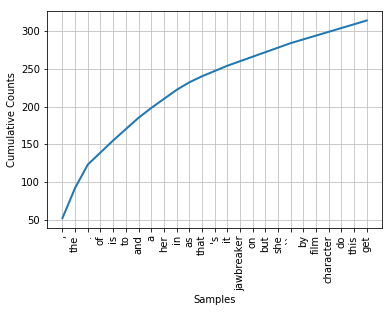

In [65]:
#back to our rotten tomatoes data

#make an nltk frequency distribution object
fdist1 = FreqDist(tokenized_reviews[0])
print('the first review has 298 unique words and 698 total words')
print (fdist1)

#fdist1.keys() returns the samples sorted in order of decreasing frequency
print ('\nprinting the top 10 most common words')
print (fdist1.most_common(10))

print ('\nsample with the greatest count '+fdist1.max())

print ('\nfrequency of the word "that" '+str(fdist1['that']))
print ('\ncumulative frequency chart of the top 25 most common words')
fdist1.plot(25, cumulative=True)

In [66]:
# build vocabulary and train gensim word2vec model
model = gensim.models.Word2Vec(
    tokenized_reviews,
    size=150,
    window=10,
    min_count=2,
    workers=10)
model.train(tokenized_reviews, total_examples=len(tokenized_reviews), epochs=10)

#number of distinct words
print (len(model.wv.vocab))

#gensim api exploration: https://radimrehurek.com/gensim/models/word2vec.html
print ('five most similar words to the entered word')
print (model.wv.most_similar(positive=['she'], topn=5))
print ('\nsimilarity score between the two entered words')
print (model.wv.similarity(w1='good',w2='great'))
print ('\nthe embedding for the entered word')
print (model.wv['she'])

print ('\ncount frequency of the entered word')
print (model.wv.vocab["she"].count)

27070
five most similar words to the entered word
[('her', 0.661903440952301), ('herself', 0.6498035192489624), ('woman', 0.5576444268226624), ('millie', 0.5453078746795654), ('merton', 0.53807133436203)]

similarity score between the two entered words
0.623619317107

the embedding for the entered word
[  1.25596952e+00  -1.51968741e+00   1.33289337e+00  -1.94179928e+00
  -3.90592366e-02  -1.37494218e+00   4.19594717e+00  -6.71272427e-02
   1.15856087e+00   4.00535488e+00   2.48245144e+00   5.10016203e+00
  -6.60709798e-01  -3.09087920e+00   1.56838262e+00   8.72227609e-01
   2.23320559e-01  -2.65941572e+00  -3.99028450e-01   2.70685881e-01
  -5.32161665e+00   5.56934261e+00  -1.16156912e+00  -6.83007121e-01
   7.41748273e-01  -4.61196937e-02   4.25626564e+00   1.11677527e+00
  -3.13399720e+00   1.41952217e+00   6.53596759e-01   6.80105947e-03
   3.07235408e+00  -1.28605831e+00   7.00706530e+00  -4.77665472e+00
   2.19718409e+00   4.63624477e+00  -2.42213774e+00  -1.04800487e+00
  -1.3

In [92]:
#now that we have our embeddings, it's time to send them to tensorflow/tensorboard

def visualize(model, output_path):
    meta_file = "w2x_metadata.tsv"
    placeholder = np.zeros((len(model.wv.index2word), 150))

    with open(os.path.join(output_path,meta_file), 'wb') as file_metadata:
        for i, word in enumerate(model.wv.index2word):
            placeholder[i] = model[word]
            # temporary solution for https://github.com/tensorflow/tensorflow/issues/9094
            if word == '':
                print("Emply Line, should replecaed by any thing else, or will cause a bug of tensorboard")
                file_metadata.write("{0}".format('<Empty Line>').encode('utf-8') + b'\n')
            else:
                file_metadata.write("{0}".format(word).encode('utf-8') + b'\n')

    # define the model without training
    sess = tf.InteractiveSession()

    embedding = tf.Variable(placeholder, trainable = False, name = 'w2x_metadata')
    tf.global_variables_initializer().run()

    saver = tf.train.Saver()
    writer = tf.summary.FileWriter(output_path, sess.graph)

    # adding into projector
    config = projector.ProjectorConfig()
    embed = config.embeddings.add()
    embed.tensor_name = 'w2x_metadata'
    embed.metadata_path = meta_file

    # Specify the width and height of a single thumbnail.
    projector.visualize_embeddings(writer, config)
    saver.save(sess, os.path.join(output_path,'w2x_metadata.ckpt'))
    print('Run `tensorboard --logdir={0}` to run visualize result on tensorboard'.format(output_path))


try:
    output_path  = 'projector'
except:
    print("Please provice model path and output path")
visualize(model, output_path)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


Run `tensorboard --logdir=projector` to run visualize result on tensorboard
